<a href="https://colab.research.google.com/github/keunsooyoon/RClass202111/blob/main/%EB%8C%80%EA%B8%B0%EC%98%A4%EC%97%BC_using_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
files <- c("ds.2015.csv", "ds.2016.csv","ds.2017.csv","ds.2018.csv","ds.2019.csv")

ds <- NULL

for (f in files) {
  tmp <- read.csv(f, header=T)
  ds <- rbind(ds, tmp)
  print(f)
}

[1] "ds.2015.csv"
[1] "ds.2016.csv"
[1] "ds.2017.csv"
[1] "ds.2018.csv"
[1] "ds.2019.csv"


In [ ]:
head(ds)

,loc,mdate,SO2,CO,O3,NO2,PM10,PM25
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,632132,2015010101,0.005,0.6,0.025,0.005,33,11
2,632132,2015010102,0.006,0.6,0.023,0.005,35,8
3,632132,2015010103,0.005,0.7,0.022,0.005,37,9
4,632132,2015010104,0.006,0.6,0.021,0.005,42,11
5,632132,2015010105,0.005,0.6,0.021,0.005,47,8
6,632132,2015010106,0.005,0.6,0.020,0.006,47,7


In [ ]:
str(ds)
# loc - 측정소 111123 서울 종로 632132 강릉 옥천 336111 목포 용당
# mdate 측정일시 매 1시간 마다 측정
# SO2 아황산가스
# CO 일산화탄소
# O3 오존
# NO2 이산화질소
# PM10 미세먼지
# PM25 초미세먼지 


'data.frame':	131472 obs. of  8 variables:
 $ loc  : int  632132 632132 632132 632132 632132 632132 632132 632132 632132 632132 ...
 $ mdate: int  2015010101 2015010102 2015010103 2015010104 2015010105 2015010106 2015010107 2015010108 2015010109 2015010110 ...
 $ SO2  : num  0.005 0.006 0.005 0.006 0.005 0.005 0.005 0.005 0.006 0.006 ...
 $ CO   : num  0.6 0.6 0.7 0.6 0.6 0.6 0.6 0.6 0.6 0.6 ...
 $ O3   : num  0.025 0.023 0.022 0.021 0.021 0.02 0.02 0.018 0.018 0.019 ...
 $ NO2  : num  0.005 0.005 0.005 0.005 0.005 0.006 0.006 0.007 0.007 0.006 ...
 $ PM10 : int  33 35 37 42 47 47 50 59 60 65 ...
 $ PM25 : int  11 8 9 11 8 7 11 9 6 5 ...


In [ ]:
unique(ds$loc)
 # loc - 측정소 111123 서울 종로 632132 강릉 옥천 336111 목포 용당

[1] 632132 111123 336111

In [ ]:
range(ds$mdate) # 하루 24번 매시간 측정

[1] 2015010101 2019123124

In [ ]:
sum(is.na(ds))

[1] 56098

In [ ]:
sum(is.na(ds$loc))

[1] 0

In [ ]:
sum(is.na(ds$mdate))

[1] 0

In [ ]:
sum(is.na(ds$SO2))

[1] 5838

In [ ]:
sum(is.na(ds$CO))

[1] 5821

In [ ]:
sum(is.na(ds$O3))

[1] 6040

In [ ]:
sum(is.na(ds$NO2))

[1] 6515

In [ ]:
sum(is.na(ds$PM10))

[1] 7725

In [ ]:
sum(is.na(ds$PM25))

[1] 24159

In [ ]:
ds <- ds[,-8]

In [ ]:
head(ds,2)

,loc,mdate,SO2,CO,O3,NO2,PM10
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,632132,2015010101,0.005,0.6,0.025,0.005,33
2,632132,2015010102,0.006,0.6,0.023,0.005,35


In [ ]:
sum(is.na(ds))

[1] 31939

In [ ]:
ds <- ds[complete.cases(ds),]

In [ ]:
sum(is.na(ds))

[1] 0

In [ ]:
dim(ds)

[1] 121270      7

In [ ]:
# ds 에는 8개 열에 약 13만건의 측정 데이터를 포함하였다. 관측 장소는 3곳이며 측정 기간은 
# 2015년 부터 2019년 까지이다. PM25열은 결측값이 아주 많으므로 열 전체를 제거 하였고
# 나머지 결측값을 포함하는 행들도 모두 제거 하였다. 


In [ ]:
str(ds)

'data.frame':	121270 obs. of  7 variables:
 $ loc  : int  632132 632132 632132 632132 632132 632132 632132 632132 632132 632132 ...
 $ mdate: int  2015010101 2015010102 2015010103 2015010104 2015010105 2015010106 2015010107 2015010108 2015010109 2015010110 ...
 $ SO2  : num  0.005 0.006 0.005 0.006 0.005 0.005 0.005 0.005 0.006 0.006 ...
 $ CO   : num  0.6 0.6 0.7 0.6 0.6 0.6 0.6 0.6 0.6 0.6 ...
 $ O3   : num  0.025 0.023 0.022 0.021 0.021 0.02 0.02 0.018 0.018 0.019 ...
 $ NO2  : num  0.005 0.005 0.005 0.005 0.005 0.006 0.006 0.007 0.007 0.006 ...
 $ PM10 : int  33 35 37 42 47 47 50 59 60 65 ...


In [ ]:
mdate <- as.character(ds$mdate)

In [ ]:
head(mdate)

[1] "2015010101" "2015010102" "2015010103" "2015010104" "2015010105"
[6] "2015010106"

In [ ]:
ds$year <- as.numeric(substr(mdate, 1,4))
ds$month <- as.numeric(substr(mdate, 5,6))
ds$hour <- as.numeric(substr(mdate, 9,10))

# 자료를 연,월,시간대로 그룹핑하여 분석하기 위해서 측정일시 값을 문자 타입으로 변환하여
# 추출하고 여기서 연 월 시간을 각각 분리하여 별도의 열로 저장한다. 

In [ ]:
head(ds)

,loc,mdate,SO2,CO,O3,NO2,PM10,year,month,hour
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,632132,2015010101,0.005,0.6,0.025,0.005,33,2015,1,1
2,632132,2015010102,0.006,0.6,0.023,0.005,35,2015,1,2
3,632132,2015010103,0.005,0.7,0.022,0.005,37,2015,1,3
4,632132,2015010104,0.006,0.6,0.021,0.005,42,2015,1,4
5,632132,2015010105,0.005,0.6,0.021,0.005,47,2015,1,5
6,632132,2015010106,0.005,0.6,0.020,0.006,47,2015,1,6


In [ ]:
table(ds$loc)


111123 336111 632132 
 41831  38397  41042 

In [ ]:
ds$locname <- NA

In [ ]:
ds$locname[ds$loc==111123] <- "Seoul"
ds$locname[ds$loc==336111] <- "Mokpo"
ds$locname[ds$loc==632132] <- "Gangneung"

# 숫자 코드로 되어 있는 측정 위치도 각각의 도시 이름으로 변환하여 새로운 열로 만든다. 

In [ ]:
table(ds$locname)


Gangneung     Mokpo     Seoul 
    41042     38397     41831 

In [ ]:
head(ds)

,loc,mdate,SO2,CO,O3,NO2,PM10,year,month,hour,locname
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>
1,632132,2015010101,0.005,0.6,0.025,0.005,33,2015,1,1,Gangneung
2,632132,2015010102,0.006,0.6,0.023,0.005,35,2015,1,2,Gangneung
3,632132,2015010103,0.005,0.7,0.022,0.005,37,2015,1,3,Gangneung
4,632132,2015010104,0.006,0.6,0.021,0.005,42,2015,1,4,Gangneung
5,632132,2015010105,0.005,0.6,0.021,0.005,47,2015,1,5,Gangneung
6,632132,2015010106,0.005,0.6,0.020,0.006,47,2015,1,6,Gangneung


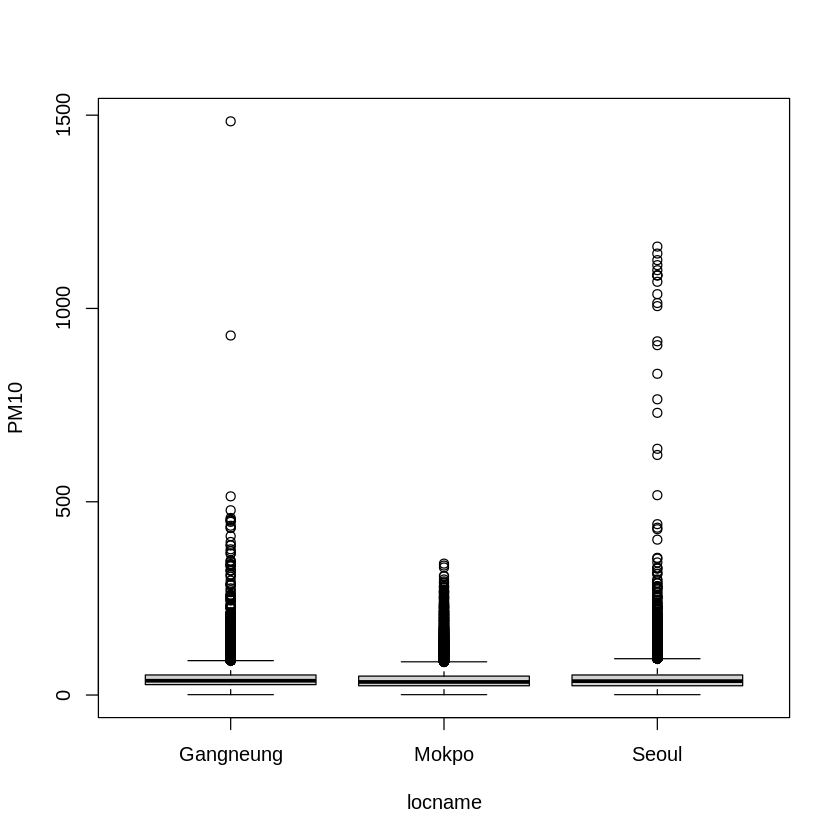

In [ ]:
boxplot(PM10~locname, data=ds)

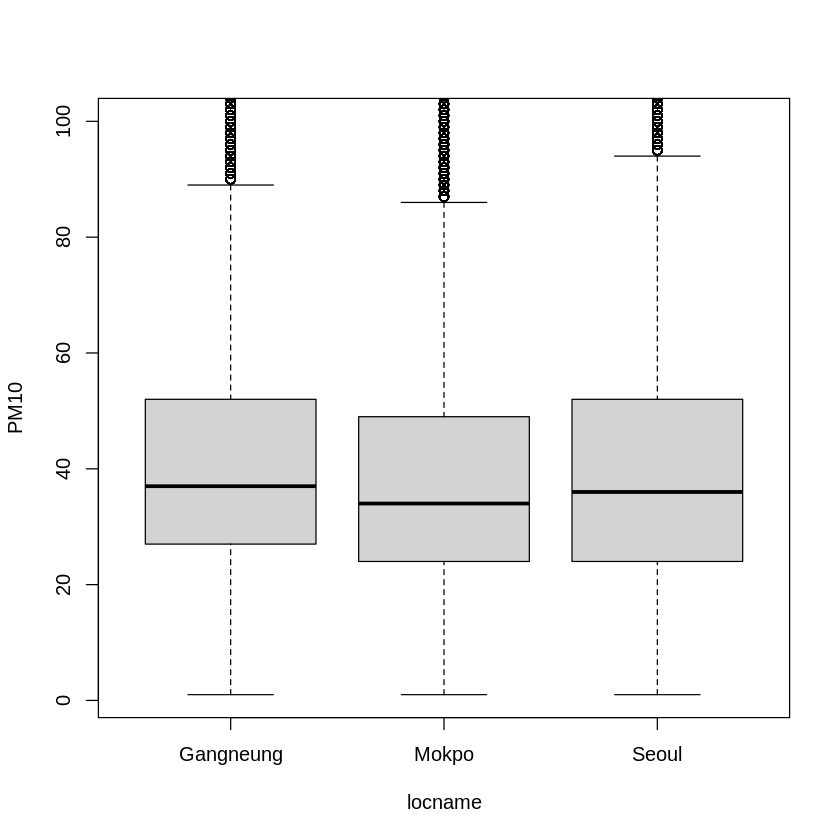

In [ ]:
boxplot(PM10~locname, data=ds, ylim=c(1,100))

# 세 지역 모두 정상 범위 보다 미세먼지 농도가 극단적으로 높아지는 값들이 존재한다. 
# 특히 목포에 비해 서울과 강릉 지역이 더 심하다. 따라서 농도의 범위를 100이하로 제한하여 보면
# 세지역 모두 정상 범위는 30~ 50 정도로 비슷한 것을 확인할 수 있다. 

In [ ]:
# 연도별 지역별 PM 10 농도 추이


tmp.year <- aggregate(ds[,7], by= list(year=ds$year, loc=ds$locname), FUN="mean")
tmp.year$loc = as.factor(tmp.year$loc)
head(tmp.year)

# ds데이터를 연도와 지역을 기준으로 평균 농도를 집계하였다. aggregate

,year,loc,x
,<dbl>,<fct>,<dbl>
1,2015,Gangneung,48.50395
2,2016,Gangneung,46.98465
3,2017,Gangneung,43.51509
4,2018,Gangneung,36.17345
5,2019,Gangneung,35.73346
6,2015,Mokpo,39.21271


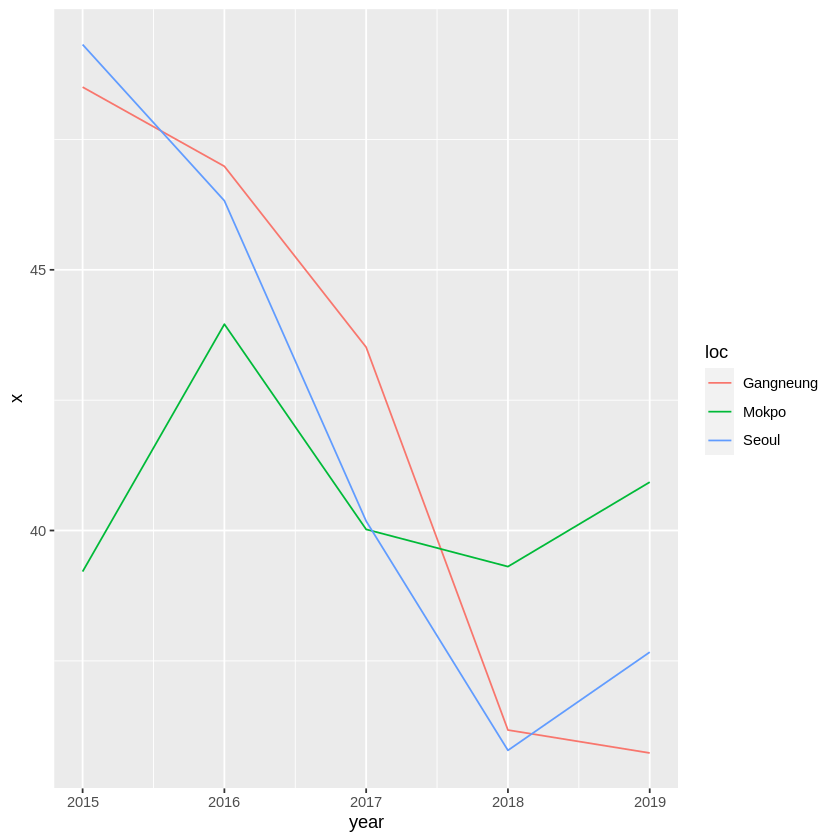

In [ ]:
library(ggplot2)

ggplot(tmp.year, aes(x=year, y=x, colour=loc, group=loc)) +
      geom_line()

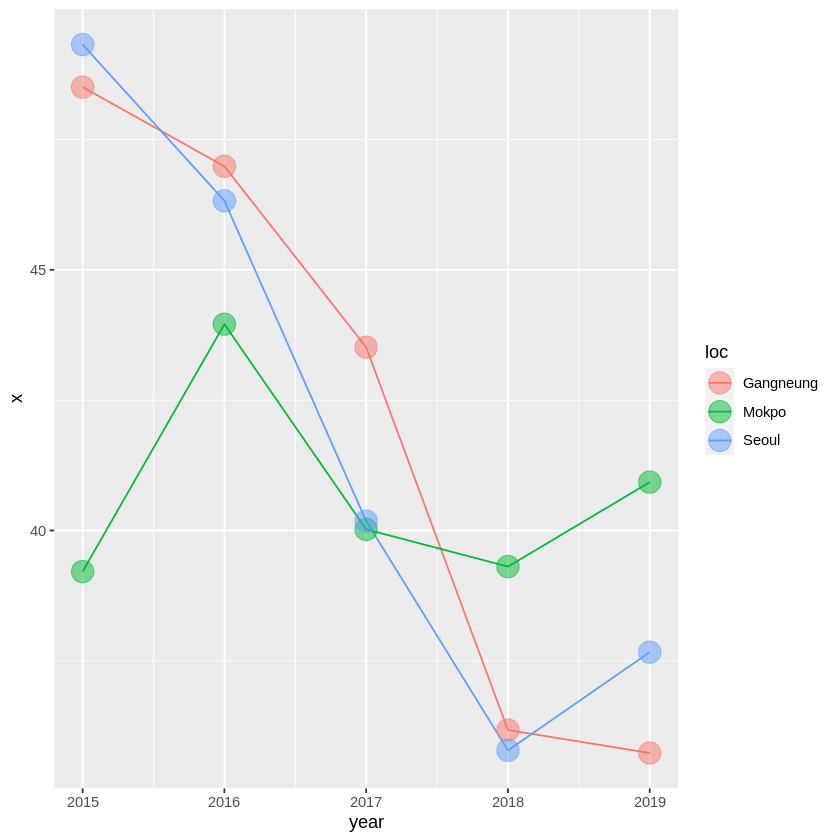

In [ ]:
library(ggplot2)

ggplot(tmp.year, aes(x=year, y=x, colour=loc, group=loc)) +
      geom_line() +
      geom_point(size=6, shape=19, alpha=0.5)

      # 전체적으로 2018년도까지 는 미세먼지 농도가 감소하다가 2019년도부터는 다시 증가하는
      # 추세를 볼수 있다. 

In [ ]:
# 월별, 지역별 PM10 농도 추이

tmp.month <- aggregate(ds[,7], by=list(month=ds$month, loc=ds$locname), FUN='mean')
tmp.month$loc = as.factor(tmp.month$loc)

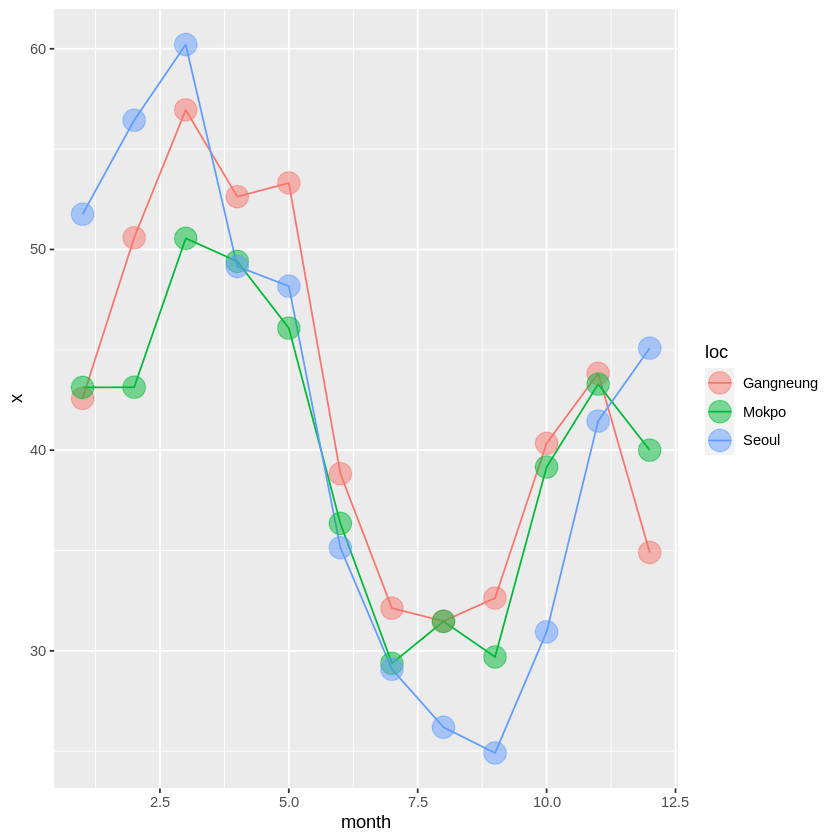

In [ ]:
ggplot(tmp.month, aes(x=month, y=x, colour=loc, group=loc)) +
      geom_line() +
      geom_point(size=6, shape=19, alpha=0.5)

#월별 미세농도 변화를 보면 겨울에서 봄으로 가면서 농도가 높아지다가 
#우기인 여름에는 농도가 낮아지는 것을 볼수 있다. 특히 서울 지역은 겨울과 봄에는 농도가 
#가장 높은데 여름에는 역시 우기 영향으로 가장 낮아지는 점을 확인할 수 있다. 

In [ ]:
tmp.hour <- aggregate(ds[,7], by=list(hour=ds$hour, loc=ds$locname), FUN='mean')
tmp.hour$loc = as.factor(tmp.hour$loc)


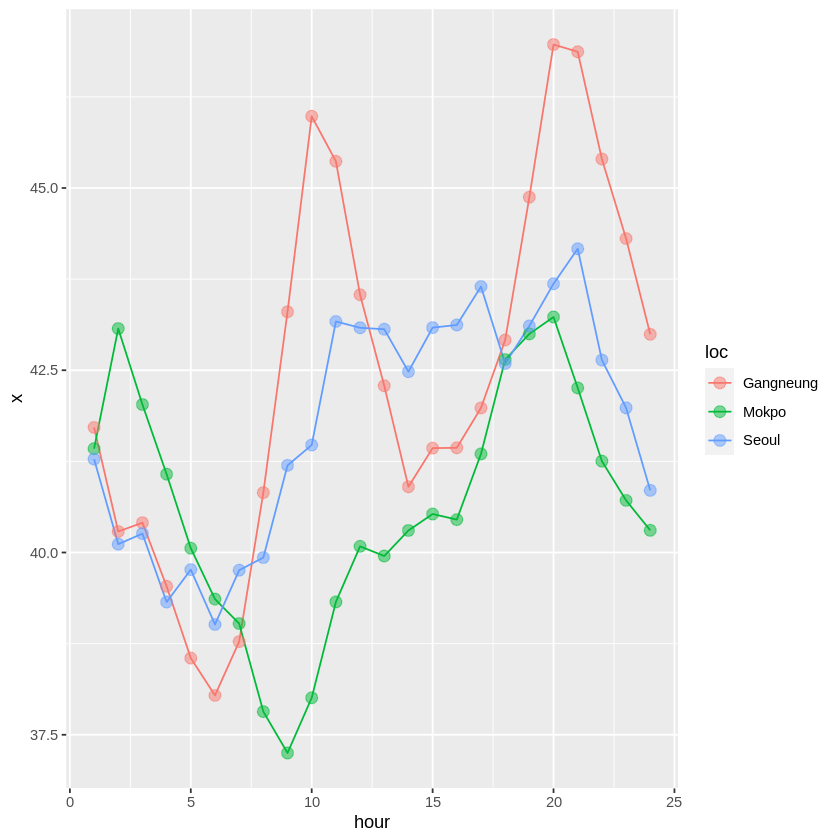

In [ ]:
ggplot(tmp.hour, aes(x=hour, y=x, colour=loc, group=loc))+
  geom_line() + 
  geom_point(size= 3, shape=19, alpha=0.5)

In [ ]:
# 시간대별 미세 농도 추이는 아침 시간대에는 낮았다가 서서히 올라가고 저녁에 가장 높아진다. 
# 따라서 어떤 시간대에 환기를 하거나 운동을하는게 좋은지에 대한 정보를 얻을 수 있다. 
# 강릉의 경우는 시간대별 미세 농도 변화의 폭이 매우 크다. 

In [ ]:
# 오염물질 농도간의 상관관계 분석
head(ds,2)

,loc,mdate,SO2,CO,O3,NO2,PM10,year,month,hour,locname
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>
1,632132,2015010101,0.005,0.6,0.025,0.005,33,2015,1,1,Gangneung
2,632132,2015010102,0.006,0.6,0.023,0.005,35,2015,1,2,Gangneung


In [ ]:
cor(ds[,3:7])
# 미세 먼지 농도와 다른 오염 물질들 간의 상관관계는 특별히 상관성을 보이는 물질은 없는 것으로 보인다. 


,SO2,CO,O3,NO2,PM10
SO2,1.0000000,0.3561397,-0.09126510,0.4182895,0.28120938
CO,0.3561397,1.0000000,-0.22502479,0.4723789,0.27845309
O3,-0.0912651,-0.2250248,1.00000000,-0.4737260,0.07889194
NO2,0.4182895,0.4723789,-0.47372596,1.0000000,0.23273135
PM10,0.2812094,0.2784531,0.07889194,0.2327313,1.00000000


In [ ]:
# 미세먼지 최고점과 최저점 (월)

tmp.yml <- aggregate(ds[,7], by=list(year=ds$year, month=ds$month, loc=ds$locname), FUN="mean")

max(tmp.yml$x)

[1] 99.06929

In [ ]:
idx = which(tmp.yml$x==max(tmp.yml$x))
tmp.yml[idx,]

,year,month,loc,x
,<dbl>,<dbl>,<chr>,<dbl>
123,2015,2,Seoul,99.06929


In [ ]:
idx = which(tmp.yml$x==min(tmp.yml$x))
tmp.yml[idx,]

,year,month,loc,x
,<dbl>,<dbl>,<chr>,<dbl>
49,2018,10,Gangneung,16.57143
